# Wine Quality Prediction

In this notebook, some features that affect the quality of a wine are given.

The following steps are applied in the project in order:

1. The dataset is imported.

1. It is observed whether there is missing data in the dataset and then necessary arrangements have been made.

1. Statistical (descriptive) analysis and then visualization of the data were made for better understanding before modeling.

1. Outliers of the data have been removed.

1. First, standardization processes were applied to the data and then is divided into train and test.

1. Machine learning models were created and model success was determined.

# 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score


In [2]:
data=pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 2.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()  # There is not missing data in the dataset. :)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.shape

(1599, 12)

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# 3.

In [8]:
dscs = data.describe().T
variances=pd.DataFrame(data.var()).rename(columns={0: "variance"})
skewness=pd.DataFrame(data.skew()).rename(columns={0: "skewness"})
kurtosiss=pd.DataFrame(data.kurtosis()).rename(columns={0: "kurtosis"})
descriptive_statistics=pd.concat([dscs,variances,skewness,kurtosiss], axis=1)
descriptive_statistics

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,3.031416,0.982751,1.132143
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.032062,0.671593,1.225542
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,0.037947,0.318337,-0.788998
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,1.987897,4.540655,28.617595
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,0.002215,5.680347,41.715787
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,109.414884,1.250567,2.023562
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,1082.102373,1.515531,3.809824
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.000004,0.071288,0.934079
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,0.023835,0.193683,0.806943
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,0.028733,2.428672,11.720251


In [9]:
data.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


In [10]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

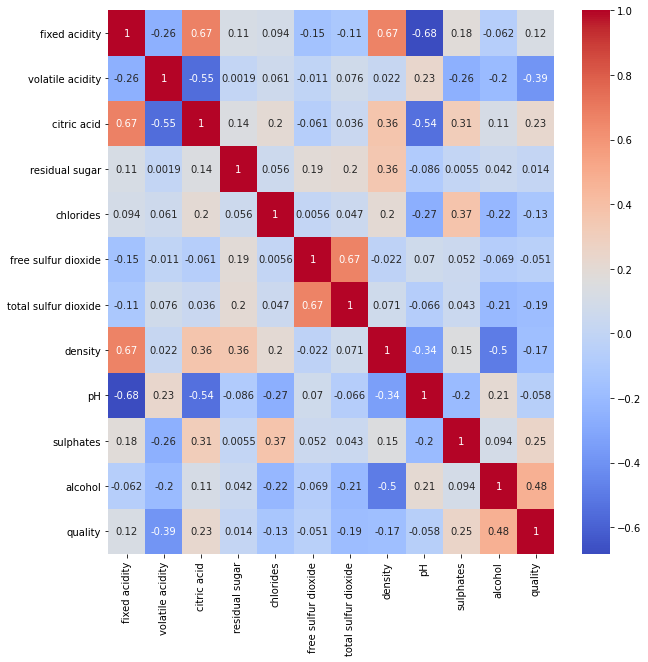

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() , annot=True , cmap="coolwarm")

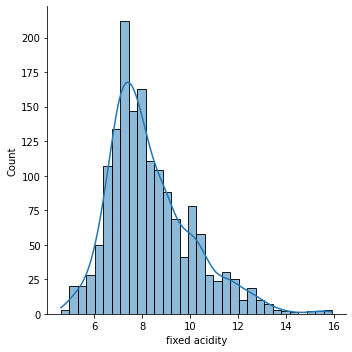

In [12]:
sns.displot(x='fixed acidity' , data=data , kde=True)

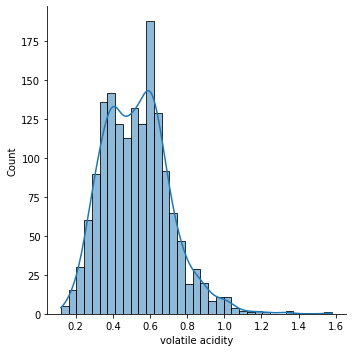

In [13]:
sns.displot(x='volatile acidity' , data=data , kde=True)

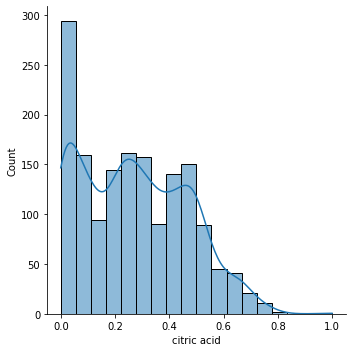

In [14]:
sns.displot(x='citric acid' , data=data , kde=True)

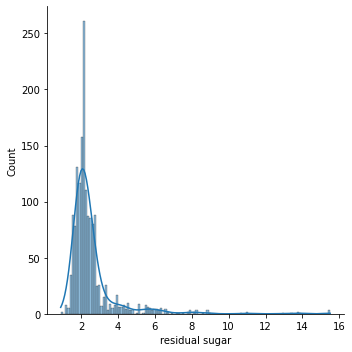

In [15]:
sns.displot(x='residual sugar' , data=data , kde=True)

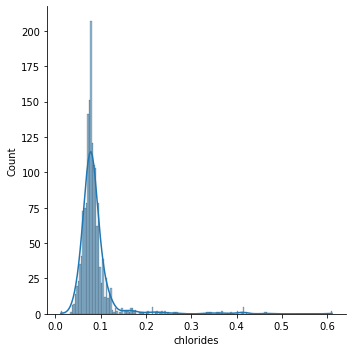

In [16]:
sns.displot(x='chlorides' , data=data , kde=True)

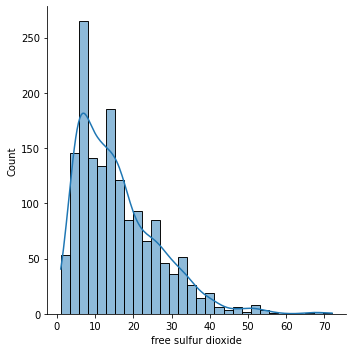

In [17]:
sns.displot(x='free sulfur dioxide' , data=data , kde=True)

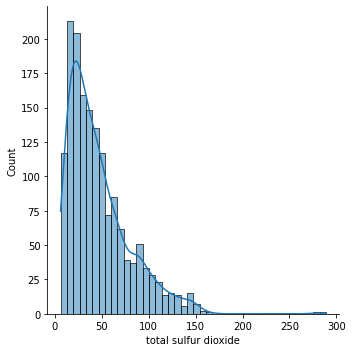

In [18]:
sns.displot(x='total sulfur dioxide' , data=data , kde=True)

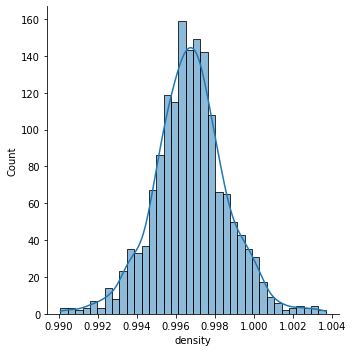

In [19]:
sns.displot(x='density' , data=data , kde=True)

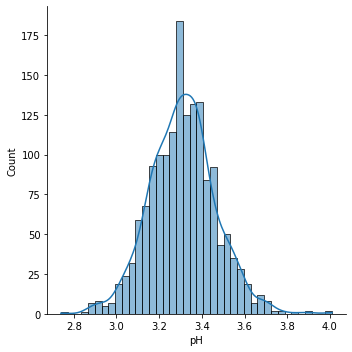

In [20]:
sns.displot(x='pH' , data=data , kde=True)

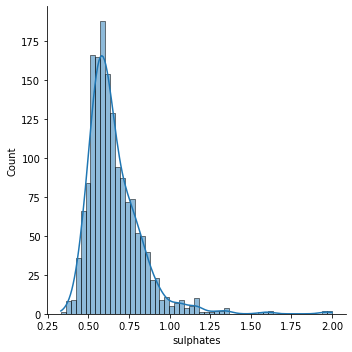

In [21]:
sns.displot(x='sulphates' , data=data , kde=True)

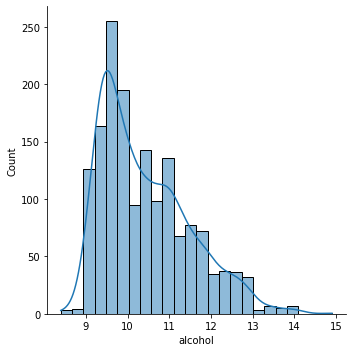

In [22]:
sns.displot(x='alcohol' , data=data , kde=True )

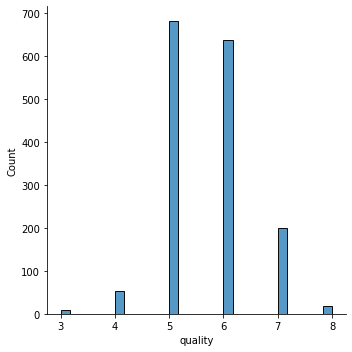

In [23]:
sns.displot(x='quality' , data=data )

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

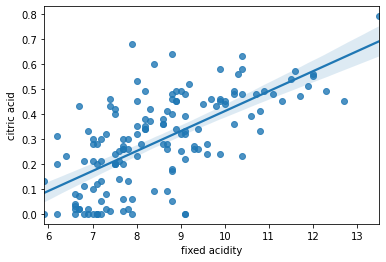

In [24]:
sns.regplot(x=data.sample(150 , random_state=1)["fixed acidity"] , y=data.sample(150 , random_state=1)["citric acid"] , data=data)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

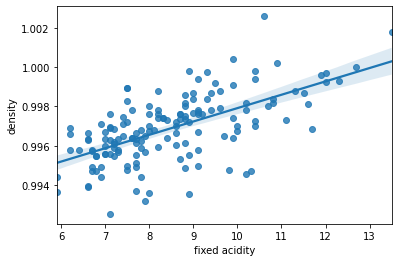

In [25]:
sns.regplot(x=data.sample(150 , random_state=1)["fixed acidity"] , y=data.sample(150 , random_state=1)["density"] , data=data)

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

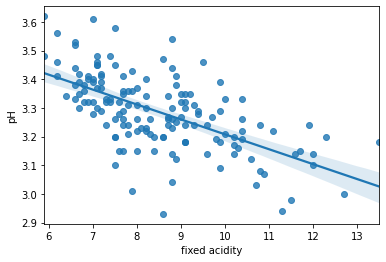

In [26]:
sns.regplot(x=data.sample(150 , random_state=1)["fixed acidity"] , y=data.sample(150 , random_state=1)["pH"] , data=data)

<AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>

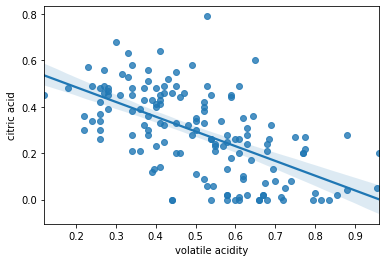

In [27]:
sns.regplot(x=data.sample(150 , random_state=1)["volatile acidity"] , y=data.sample(150 , random_state=1)["citric acid"] , data=data)

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

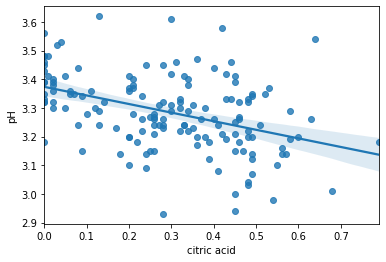

In [28]:
sns.regplot(x=data.sample(150 , random_state=1)["citric acid"] , y=data.sample(150 , random_state=1)["pH"] , data=data)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

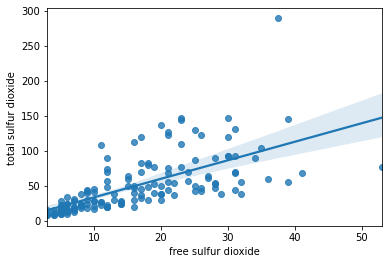

In [29]:
sns.regplot(x=data.sample(150 , random_state=1)["free sulfur dioxide"] , y=data.sample(150 , random_state=1)["total sulfur dioxide"] , data=data)

AxesSubplot(0.125,0.125;0.775x0.755)


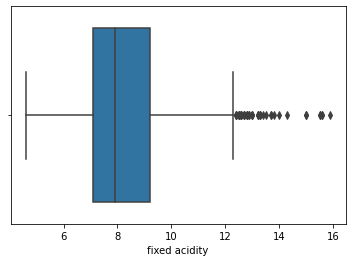

In [30]:
print(sns.boxplot(x=data['fixed acidity']))

AxesSubplot(0.125,0.125;0.775x0.755)


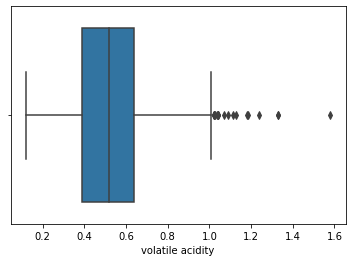

In [31]:
print(sns.boxplot(x=data['volatile acidity']))


AxesSubplot(0.125,0.125;0.775x0.755)


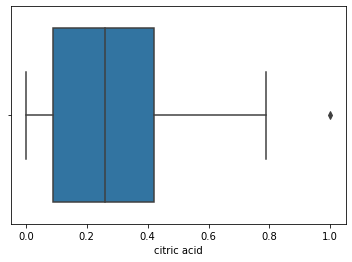

In [32]:
print(sns.boxplot(x=data['citric acid']))


AxesSubplot(0.125,0.125;0.775x0.755)


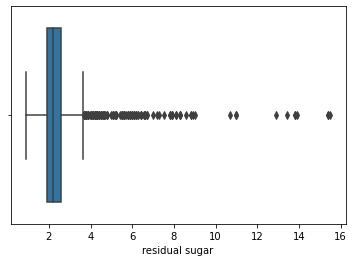

In [33]:
print(sns.boxplot(x=data['residual sugar']))


AxesSubplot(0.125,0.125;0.775x0.755)


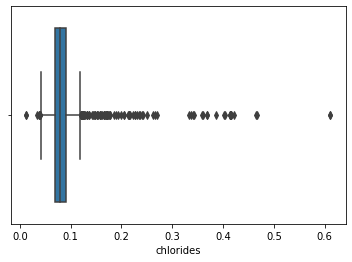

In [34]:
print(sns.boxplot(x=data['chlorides']))


AxesSubplot(0.125,0.125;0.775x0.755)


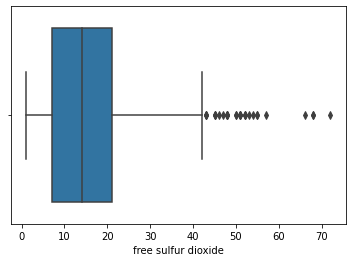

In [35]:
print(sns.boxplot(x=data['free sulfur dioxide']))


AxesSubplot(0.125,0.125;0.775x0.755)


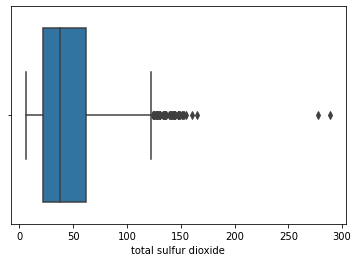

In [36]:
print(sns.boxplot(x=data['total sulfur dioxide']))


AxesSubplot(0.125,0.125;0.775x0.755)


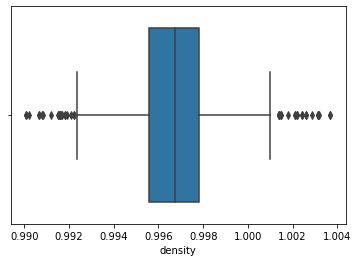

In [37]:
print(sns.boxplot(x=data['density']))


AxesSubplot(0.125,0.125;0.775x0.755)


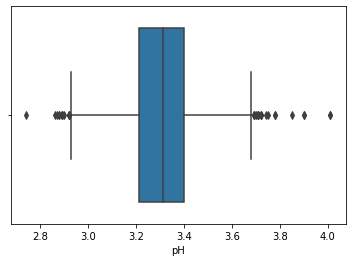

In [38]:
print(sns.boxplot(x=data['pH']))


AxesSubplot(0.125,0.125;0.775x0.755)


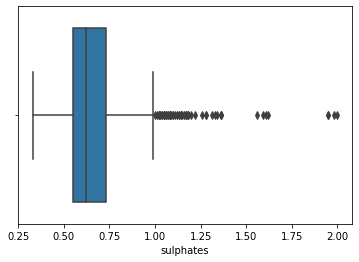

In [39]:
print(sns.boxplot(x=data['sulphates']))


AxesSubplot(0.125,0.125;0.775x0.755)


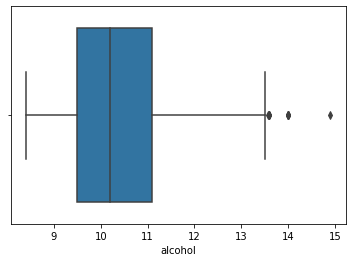

In [40]:
print(sns.boxplot(x=data['alcohol']))


AxesSubplot(0.125,0.125;0.775x0.755)


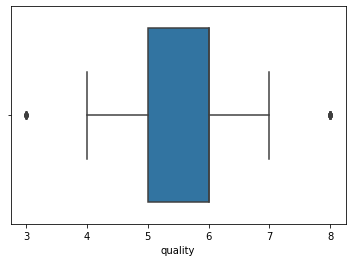

In [41]:
print(sns.boxplot(x=data['quality']))

# 4.

In [42]:
clf = LocalOutlierFactor(n_neighbors=5)
clf

LocalOutlierFactor(n_neighbors=5)

In [43]:
pred = clf.fit_predict(data)

In [44]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
data[pred == -1]  # outlier value

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,6
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
57,7.5,0.630,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1532,7.2,0.530,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,6
1540,6.2,0.520,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,6
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


In [46]:
dt = data[pred == 1]
dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 5.

In [47]:
x = dt.drop(["quality"] , axis=1)

In [48]:
y = dt["quality"]

In [49]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [50]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1538, dtype: int64

In [51]:
scaler = StandardScaler()

In [52]:
x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

In [53]:
x.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.535953,0.948816,-1.387261,-0.468229,-0.243873,-0.476616,-0.379451,0.577588,1.297161,-0.572955,-0.966995
1,-0.301611,1.953117,-1.387261,0.114372,0.224254,0.882925,0.661951,0.033215,-0.731842,0.134225,-0.581837
2,-0.301611,1.283583,-1.180491,-0.135314,0.096583,-0.088176,0.251702,0.142089,-0.339132,-0.042570,-0.581837
3,1.690289,-1.394555,1.507519,-0.468229,-0.265151,0.106044,0.441048,0.686463,-0.993649,-0.455092,-0.581837
4,-0.535953,0.948816,-1.387261,-0.468229,-0.243873,-0.476616,-0.379451,0.577588,1.297161,-0.572955,-0.966995


In [54]:
ly=list(y)

In [55]:
ynew=pd.Series([1 if x>6 else 0 for x in ly])
ynew

0       0
1       0
2       0
3       0
4       0
       ..
1533    0
1534    0
1535    0
1536    0
1537    0
Length: 1538, dtype: int64

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,ynew,train_size=0.7,shuffle=True,random_state=45)


# 6.

--------------------------------------------------------------------------------------------------------

In [57]:
loj_model = LogisticRegression(solver="liblinear").fit(x_train,y_train)
y_pred = loj_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8874458874458875

In [58]:
cross_val_score(loj_model , x_test , y_test , cv=10).mean()

0.8873728029602219

----------------------------------------------------------------------------------------------------------

In [59]:
knn_model = KNeighborsClassifier().fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8766233766233766

In [60]:
cross_val_score(knn_model , x_test , y_test , cv=10).mean()

0.8506475485661424

-------------------------------------------------------------------------------------------------------

In [61]:
svm_model = SVC(kernel="linear").fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8658008658008658

In [62]:
cross_val_score(svm_model , x_test , y_test , cv=10).mean()

0.8895929694727103

-------------------------------------------------------------------------------------------------------

In [63]:
cart_model = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = cart_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8787878787878788

In [64]:
cross_val_score(cart_model , x_test , y_test , cv=10).mean()

0.8331174838112858

----------------------------------------------------------------------------------------------------------

In [65]:
rf_model = RandomForestClassifier().fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9199134199134199

In [66]:
cross_val_score(rf_model , x_test , y_test , cv=3).mean()

0.8658008658008658

--------------------------------------------------------------------------------------------------------

In [67]:
gbm_model = GradientBoostingClassifier().fit(x_train,y_train)
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9004329004329005

In [68]:
cross_val_score(gbm_model , x_test , y_test , cv=10).mean()

0.8635060129509713